In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
from sklearn.metrics import confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
import scipy.sparse

In [69]:
df_fake_train = pd.read_csv('data\\Fake_training.csv')
df_real_train = pd.read_csv('data\\True_training.csv')
df_fake_test = pd.read_csv('data\\Fake_testing.csv')
df_real_test = pd.read_csv('data\\True_testing.csv')

df_real_test.head(10)

,title,text,subject,date
0,Turkish army expands deployment in Syria's nor...,AMMAN (Reuters) - The Turkish army is expandin...,worldnews,"October 15, 2017"
1,Trump to sign Russia sanctions bill: White House,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"July 29, 2017"
2,"Danger of war, Germany warns after Trump's mov...",BERLIN (Reuters) - If the United States termin...,politicsNews,"October 14, 2017"
3,South Carolina Republican's town hall starts r...,"NORTH CHARLESTON, S.C. (Reuters) - U.S. Senato...",politicsNews,"February 25, 2017"
4,UK PM May concerned by reports of sexual haras...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"October 27, 2017"
5,Trump backers' disparate hopes coalesce around...,WASHINGTON (Reuters) - The pomp and circumstan...,politicsNews,"January 20, 2017"
6,Brussels prosecutors to speak on ex-Catalan le...,BRUSSELS (Reuters) - Brussels prosecutors will...,worldnews,"November 5, 2017"
7,Republican wins Montana special election despi...,"BOZEMAN, Mont. (Reuters) - Republican Greg Gia...",politicsNews,"May 25, 2017"
8,Hariri indicates possibility of revoking his r...,"BEIRUT (Reuters) - Saad al-Hariri, who announc...",worldnews,"November 12, 2017"
9,Australia to move 200 asylum seekers to new PN...,SYDNEY (Reuters) - Approximately two hundred m...,worldnews,"September 15, 2017"


In [70]:
df_real_train["text"] = df_real_train["text"].replace(r"\(Reuters\)\s*", "", regex=True)
df_real_test["text"] = df_real_test["text"].replace(r"\(Reuters\)\s*", "", regex=True)
df_real_train.head()

,title,text,subject,date
0,Europe rights watchdog says Turkey's emergency...,BRUSSELS - A leading European rights watchdog ...,worldnews,"October 6, 2017"
1,Exclusive: Trump targets illegal immigrants wh...,"- In September 2014, Gilberto Velasquez, a 38-...",politicsNews,"June 9, 2017"
2,"At G20 summit, Trump pledges $639 million in a...",HAMBURG - U.S. President Donald Trump on Satur...,politicsNews,"July 8, 2017"
3,Ex-Christie associates lose bid for new trial ...,NEW YORK - A federal judge rejected a request ...,politicsNews,"March 2, 2017"
4,Young blacks more open to Bernie Sanders' Whit...,"ORANGEBURG, S.C. - If Democratic hopeful Berni...",politicsNews,"February 12, 2016"


In [71]:
df_real_train['label'] = 1
df_fake_train['label'] = 0
df_fake_test['label'] = 0
df_real_test['label'] = 1

df_fake_test

,title,text,subject,date,label
0,Sean Hannity Just Said Child Molestation Is O...,Republicans for some reason think it s perfect...,News,"November 9, 2017",0
1,Boiler Room EP #69 – CULTure Club,Tune in to the Alternate Current Radio Network...,Middle-east,"August 18, 2016",0
2,Chris Christie Takes Marco Rubio To The Woods...,Marco Rubio was looming large in New Hampshire...,News,"February 7, 2016",0
3,FIVE FACTS About Benghazi That Hillary Doesn’t...,FIVE FACTS ABOUT HILLARY AND BENGHAZI:,Government News,"Jul 29, 2016",0
4,Stuck on Stupid: Why is America Starting WW3?,SARTRE 21st Century WireEvery day the world mo...,US_News,"October 11, 2016",0
...,...,...,...,...,...
9388,U OF CHICAGO Admissions Blames Trump For Chica...,The University of Chicago s admissions office ...,politics,"Jan 9, 2017",0
9389,HOW FAILED DEMOCRAT LEADERSHIP IS TAKING NYC B...,Miss him yet?Here s an up-close look at a qual...,left-news,"Jul 11, 2015",0
9390,This One Image From The RNC Is All You Need T...,Donald Trump is terrible. He wants to build a ...,News,"July 21, 2016",0
9391,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,News,"July 14, 2017",0


In [72]:
print(len(df_fake_train), len(df_real_train))

14088 12850


In [ ]:
'''
df_fake_manual_testing = df_fake.tail(10)
for i in range(14087,14077,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
df_real_manual_testing = df_real.tail(10)
for i in range(12849, 12839, -1):
    df_real.drop([i], axis = 0, inplace = True)
'''

In [73]:
print(len(df_fake_test), len(df_real_test))

9393 8567


In [ ]:
#df_fake_manual_testing.head()

In [ ]:
#df_manual_testing = pd.concat([df_fake_manual_testing,df_real_manual_testing], axis = 0)
#df_manual_testing.to_csv("data\\manual_testing_new.csv")

In [74]:
df = pd.concat([df_real_train, df_fake_train], axis = 0)
df_test = pd.concat([df_real_test, df_fake_test], axis = 0)
df.head(10)

,title,text,subject,date,label
0,Europe rights watchdog says Turkey's emergency...,BRUSSELS - A leading European rights watchdog ...,worldnews,"October 6, 2017",1
1,Exclusive: Trump targets illegal immigrants wh...,"- In September 2014, Gilberto Velasquez, a 38-...",politicsNews,"June 9, 2017",1
2,"At G20 summit, Trump pledges $639 million in a...",HAMBURG - U.S. President Donald Trump on Satur...,politicsNews,"July 8, 2017",1
3,Ex-Christie associates lose bid for new trial ...,NEW YORK - A federal judge rejected a request ...,politicsNews,"March 2, 2017",1
4,Young blacks more open to Bernie Sanders' Whit...,"ORANGEBURG, S.C. - If Democratic hopeful Berni...",politicsNews,"February 12, 2016",1
5,New York attorney general says will sue over O...,- New York state Attorney General Eric Schneid...,politicsNews,"July 17, 2017",1
6,Indonesian parliament speaker quits amid graft...,JAKARTA - The speaker of Indonesia s parliamen...,worldnews,"December 11, 2017",1
7,Spanish lender Sabadell to transfer legal base...,MADRID - Spanish lender Sabadell decided on Th...,worldnews,"October 5, 2017",1
8,House speaker tells Trump healthcare bill lack...,WASHINGTON - U.S. House Speaker Paul Ryan told...,politicsNews,"March 24, 2017",1
9,Britain says expects most EU citizens can stay...,LONDON - The British government said on Tuesda...,worldnews,"November 7, 2017",1


In [75]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [76]:
df = df.drop(["title", "subject","date"], axis = 1)
df_test = df_test.drop(["title", "subject","date"], axis = 1)

In [77]:
df.isnull().sum()


text     0
label    0
dtype: int64

In [78]:
df_test.isnull().sum()

text     0
label    0
dtype: int64

In [79]:
df = df.sample(frac = 1)

In [80]:
df.head()

,text,label
5761,OSLO - The leader of the International Campaig...,1
107,WASHINGTON - Charges brought against President...,1
6139,We know that Trump wants to ban Muslims from b...,0
1746,LONDON - A magnitude 5.9 earthquake hit off th...,1
12501,Remember when Bill O Reilly took a vacation af...,0


In [81]:
df.reset_index(inplace = True)


In [ ]:
df.drop(["index"], axis = 1, inplace = True)
#df.drop(['level_0'], axis = 1, inplace = True)
df.head()

In [84]:
df.columns

Index(['text', 'label'], dtype='object')

In [85]:
df.head()

,text,label
0,OSLO - The leader of the International Campaig...,1
1,WASHINGTON - Charges brought against President...,1
2,We know that Trump wants to ban Muslims from b...,0
3,LONDON - A magnitude 5.9 earthquake hit off th...,1
4,Remember when Bill O Reilly took a vacation af...,0


Thống kê ban đầu:
Số lượng tin thật: 12850
Số lượng tin giả: 14088


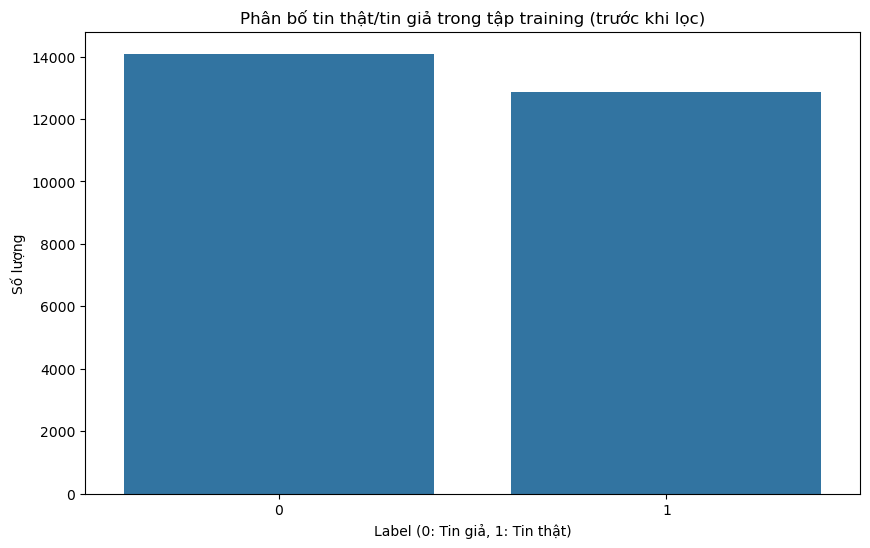

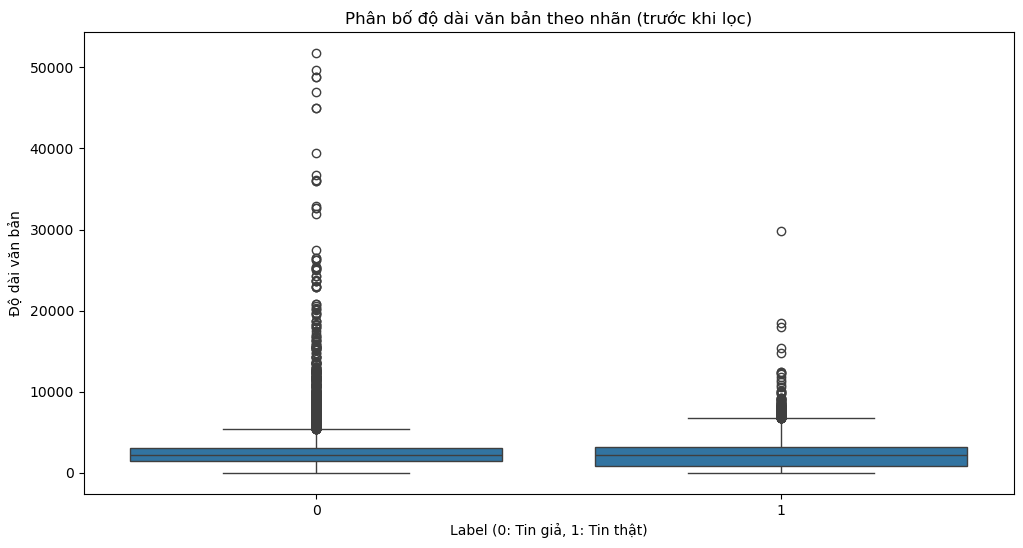


Thống kê độ dài văn bản cho tin thật:
count    12850.00000
mean      2376.56786
std       1692.24454
min          1.00000
25%        889.25000
50%       2214.00000
75%       3236.75000
max      29771.00000
Name: original_length, dtype: float64

Thống kê độ dài văn bản cho tin giả:
count    14088.000000
mean      2543.159781
std       2491.543303
min          1.000000
25%       1440.000000
50%       2169.000000
75%       3038.000000
max      51794.000000
Name: original_length, dtype: float64

Số tin giả có độ dài > 20000: 43

Thống kê sau khi lọc:
Số lượng tin thật: 12850
Số lượng tin giả: 14045


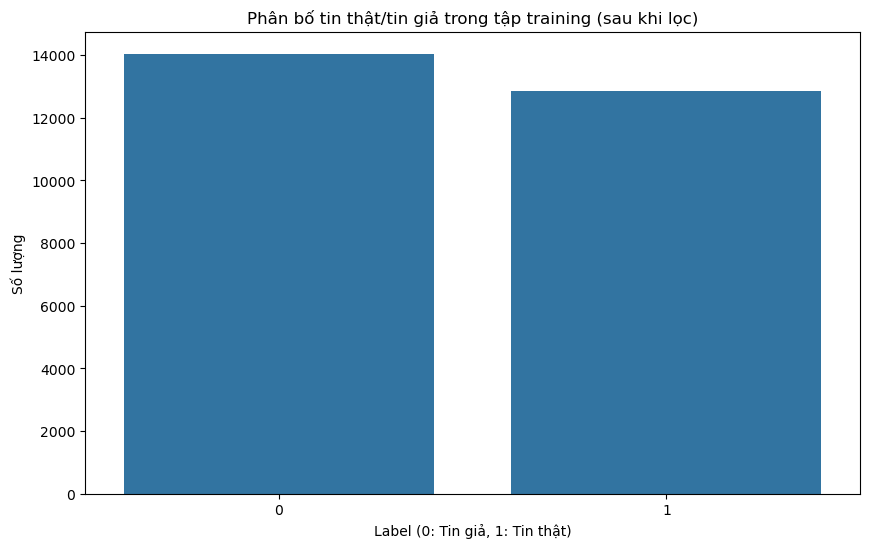

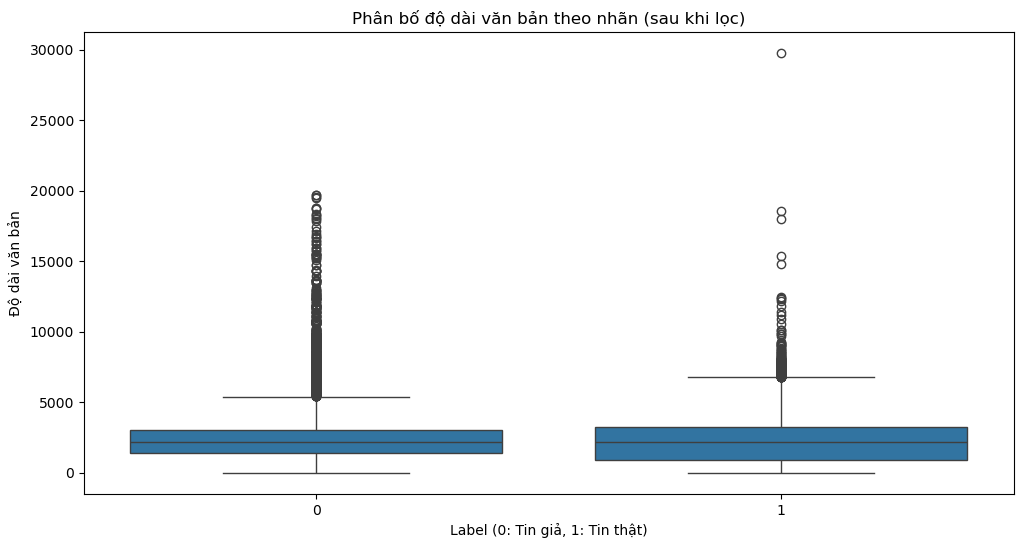


Thống kê độ dài văn bản cho tin thật (sau khi lọc):
count    12850.00000
mean      2376.56786
std       1692.24454
min          1.00000
25%        889.25000
50%       2214.00000
75%       3236.75000
max      29771.00000
Name: original_length, dtype: float64

Thống kê độ dài văn bản cho tin giả (sau khi lọc):
count    14045.000000
mean      2458.962763
std       1907.186907
min          1.000000
25%       1437.000000
50%       2166.000000
75%       3025.000000
max      19723.000000
Name: original_length, dtype: float64


In [ ]:
# Tiếp tục xử lý dữ liệu như bình thường
def wordopt(text):
    # Download stopwords nếu chưa có
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')
    
    # Lấy danh sách stopwords tiếng Anh
    stop_words = set(nltk.corpus.stopwords.words('english'))
    
    text = text.lower()  # Chuyển tất cả thành chữ thường
    text = re.sub(r'\[.*?\]', '', text)  # Loại bỏ văn bản trong dấu ngoặc vuông
    text = re.sub(r"\W", " ", text)  # Loại bỏ ký tự không phải chữ cái và số
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Loại bỏ liên kết URL
    text = re.sub(r'<.*?>', '', text)  # Loại bỏ các thẻ HTML
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Loại bỏ dấu câu
    text = re.sub(r'\n', '', text)  # Loại bỏ ký tự xuống dòng
    text = re.sub(r'\w*\d\w*', '', text)  # Loại bỏ từ có chứa số
    
    # Loại bỏ stopwords
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])
    
    return text

In [87]:
df["text"] = df["text"].apply(wordopt)
df_test["text"] = df_test["text"].apply(wordopt)
df.head()

,text,label
0,oslo leader international campaign abolish nuc...,1
1,washington charges brought president donald tr...,1
2,know trump wants ban muslims able enter u face...,0
3,london magnitude earthquake hit coast papua ne...,1
4,remember bill reilly took vacation sexual hara...,0


In [88]:
x_train = df["text"]
y_train = df["label"]
x_test = df_test["text"]
y_test = df_test["label"]

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [90]:
# Trích xuất độ dài văn bản cho tập training và test
text_length_train = df['text'].apply(len)
text_length_test = df_test['text'].apply(len)

# Kết hợp feature độ dài với TF-IDF features
xv_train_with_length = scipy.sparse.hstack([
    xv_train,
    scipy.sparse.csr_matrix(text_length_train.values.reshape(-1, 1))
])

xv_test_with_length = scipy.sparse.hstack([
    xv_test,
    scipy.sparse.csr_matrix(text_length_test.values.reshape(-1, 1))
])

LOGISTIC REGRESSION

In [91]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train_with_length, y_train)
pred_lr = LR.predict(xv_test_with_length)
print("\nLogistic Regression với feature độ dài:")
print("Accuracy:", LR.score(xv_test_with_length, y_test))
print(classification_report(y_test, pred_lr))


Logistic Regression với feature độ dài:
Accuracy: 0.9592984409799554
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9393
           1       0.95      0.96      0.96      8567

    accuracy                           0.96     17960
   macro avg       0.96      0.96      0.96     17960
weighted avg       0.96      0.96      0.96     17960



DECISION TREE CLASSIFICATION

In [92]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train_with_length, y_train)
pred_dt = DT.predict(xv_test_with_length)
print("\nDecision Tree với feature độ dài:")
print("Accuracy:", DT.score(xv_test_with_length, y_test))
print(classification_report(y_test, pred_dt))


Decision Tree với feature độ dài:
Accuracy: 0.9514476614699332
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      9393
           1       0.96      0.94      0.95      8567

    accuracy                           0.95     17960
   macro avg       0.95      0.95      0.95     17960
weighted avg       0.95      0.95      0.95     17960



GRADIENT BOOSTING CLASSIFIER

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train_with_length, y_train)
pred_gbc = GBC.predict(xv_test_with_length)
print("\nGradient Boosting với feature độ dài:")
print("Accuracy:", GBC.score(xv_test_with_length, y_test))
print(classification_report(y_test, pred_gbc))


Gradient Boosting với feature độ dài:
Accuracy: 0.9596881959910913
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9393
           1       0.96      0.96      0.96      8567

    accuracy                           0.96     17960
   macro avg       0.96      0.96      0.96     17960
weighted avg       0.96      0.96      0.96     17960



RANDOM FOREST CLASSIFIER

In [94]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train_with_length, y_train)
pred_rfc = RFC.predict(xv_test_with_length)
print("\nRandom Forest với feature độ dài:")
print("Accuracy:", RFC.score(xv_test_with_length, y_test))
print(classification_report(y_test, pred_rfc))


Random Forest với feature độ dài:
Accuracy: 0.9811247216035635
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9393
           1       0.98      0.98      0.98      8567

    accuracy                           0.98     17960
   macro avg       0.98      0.98      0.98     17960
weighted avg       0.98      0.98      0.98     17960

Accuracy: 0.9811247216035635
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9393
           1       0.98      0.98      0.98      8567

    accuracy                           0.98     17960
   macro avg       0.98      0.98      0.98     17960
weighted avg       0.98      0.98      0.98     17960



XGBOOST

In [95]:
from xgboost import XGBClassifier

XG = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, n_jobs=-1)
XG.fit(xv_train_with_length, y_train)
pred_xg = XG.predict(xv_test_with_length)
print("\nXGBoost với feature độ dài:")
print("Accuracy:", XG.score(xv_test_with_length, y_test))
print(classification_report(y_test, pred_xg))


XGBoost với feature độ dài:
Accuracy: 0.9608574610244989
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9393
           1       0.96      0.96      0.96      8567

    accuracy                           0.96     17960
   macro avg       0.96      0.96      0.96     17960
weighted avg       0.96      0.96      0.96     17960



TESTING MODEL

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    news = re.sub(r"\(Reuters\)\s*", '', news)
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    
    # Thêm feature độ dài văn bản cho testing
    text_length = len(new_def_test["text"].iloc[0])
    new_xv_test_with_length = scipy.sparse.hstack([
        new_xv_test,
        scipy.sparse.csr_matrix([[text_length]])
    ])
    
    pred_LR = LR.predict(new_xv_test_with_length)
    #pred_DT = DT.predict(new_xv_test_with_length)
    #pred_GBC = GBC.predict(new_xv_test_with_length)
    #pred_RFC = RFC.predict(new_xv_test_with_length)
    #pred_XG = XG.predict(new_xv_test_with_length)
    
    return print("\n\nLR Prediction: {}".format(output_lable(pred_LR[0])))

new = str(input())
manual_testing(new)

In [ ]:
# So sánh các mô hình
models = {
    'Logistic Regression': (LR, pred_lr),
    'Decision Tree': (DT, pred_dt),
    'Gradient Boosting': (GBC, pred_gbc),
    'Random Forest': (RFC, pred_rfc),
    'XGBoost': (XG, pred_xg)
}

# Tính toán các metrics cho từng mô hình
results = []
for name, (model, predictions) in models.items():
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1-Score': report['macro avg']['f1-score']
    })

results_df = pd.DataFrame(results)

# 1. So sánh accuracy của các mô hình
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy')
plt.title('So sánh độ chính xác của các mô hình')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. So sánh các metrics khác nhau
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(12, 6))
results_df_melted = results_df.melt(id_vars=['Model'], value_vars=metrics, var_name='Metric', value_name='Score')
sns.barplot(data=results_df_melted, x='Model', y='Score', hue='Metric')
plt.title('So sánh các metrics của các mô hình')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Vẽ Confusion Matrix cho Random Forest (mô hình tốt nhất)
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, pred_rfc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()

# 4. So sánh ROC curves
plt.figure(figsize=(10, 6))
for name, (model, predictions) in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(xv_test_with_length)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves cho các mô hình')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# In bảng so sánh chi tiết
print("\nBảng so sánh chi tiết các mô hình:")
print(results_df.round(4).to_string(index=False))